In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
data=pd.read_csv("/kaggle/input/cleaned-dataset/cleaned_diabetes_dataset.csv")


In [46]:
# Ensure CLASS column contains only 'Y', 'N', and 'P'
data["CLASS"] = data["CLASS"].str.strip().str.upper()

# Verify the changes
print(data["CLASS"].value_counts())


CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


In [48]:
data.to_csv("cleaned_diabetes_dataset.csv", index=False)


In [9]:
data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
data.duplicated().sum()

# data visual

<function matplotlib.pyplot.show(close=None, block=None)>

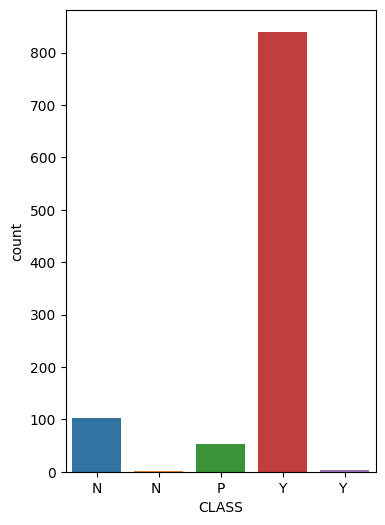

In [14]:
plt.figure(figsize=(4,6))
sns.countplot(x='CLASS',data=data)
plt.show

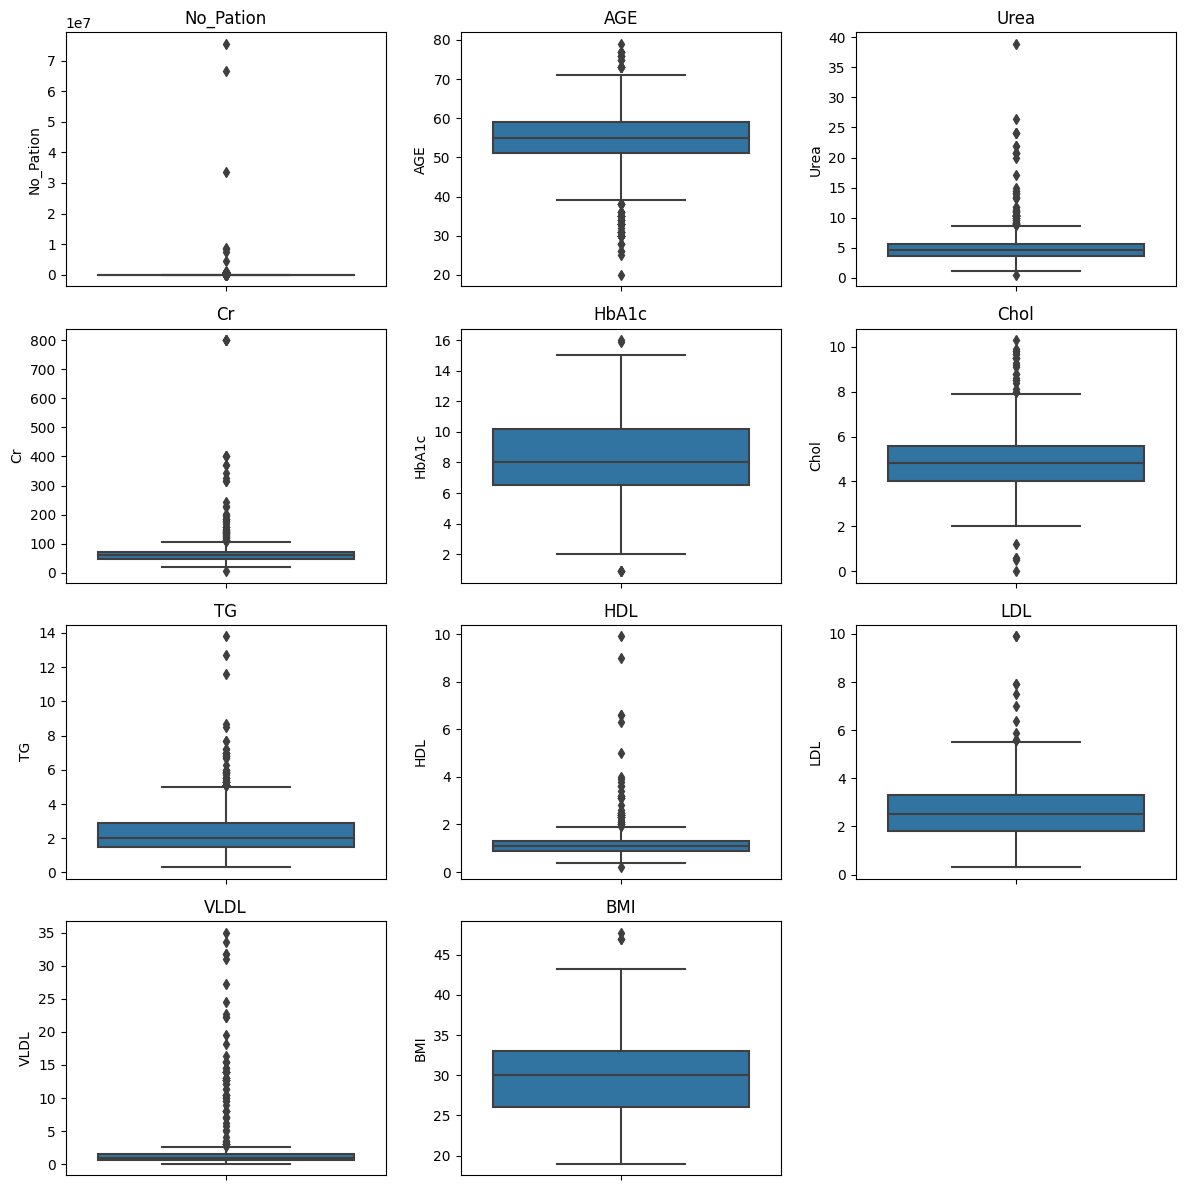

In [16]:
numerical_columns = ['No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 
                     'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


plt.figure(figsize=(12, 12))


for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)  
    sns.boxplot(y=col, data=data) 
    plt.title(col)

plt.tight_layout() 
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

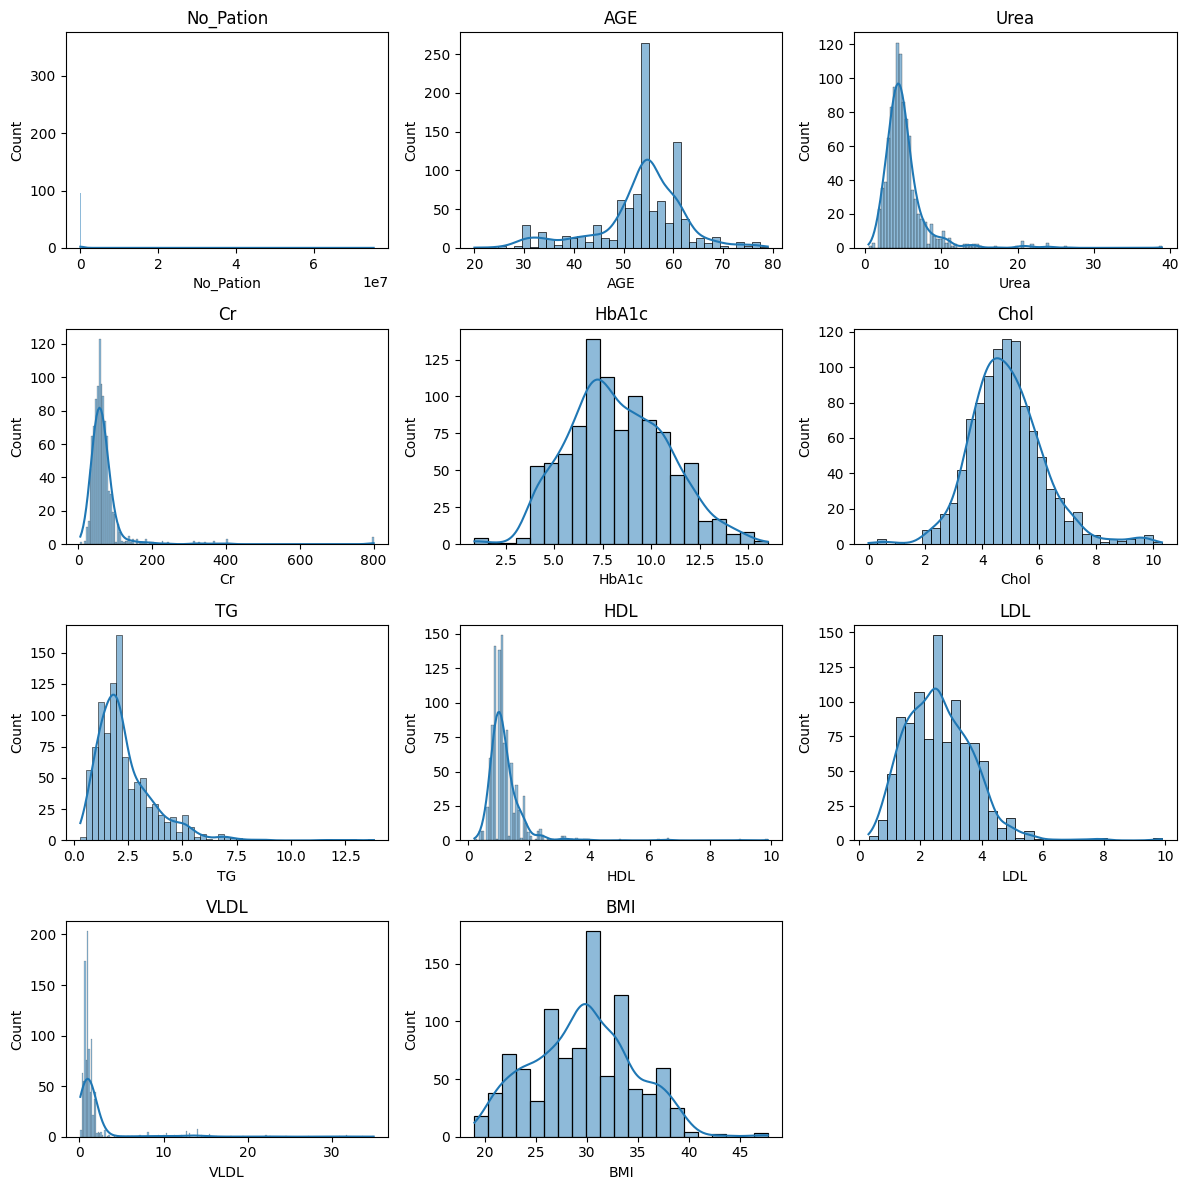

In [18]:
numerical_columns = ['No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 
                     'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Set figure size
plt.figure(figsize=(12, 12))

# Loop through columns and create histograms
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot grid size
    sns.histplot(x=col, data=data, kde=True)  # Histogram with KDE
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


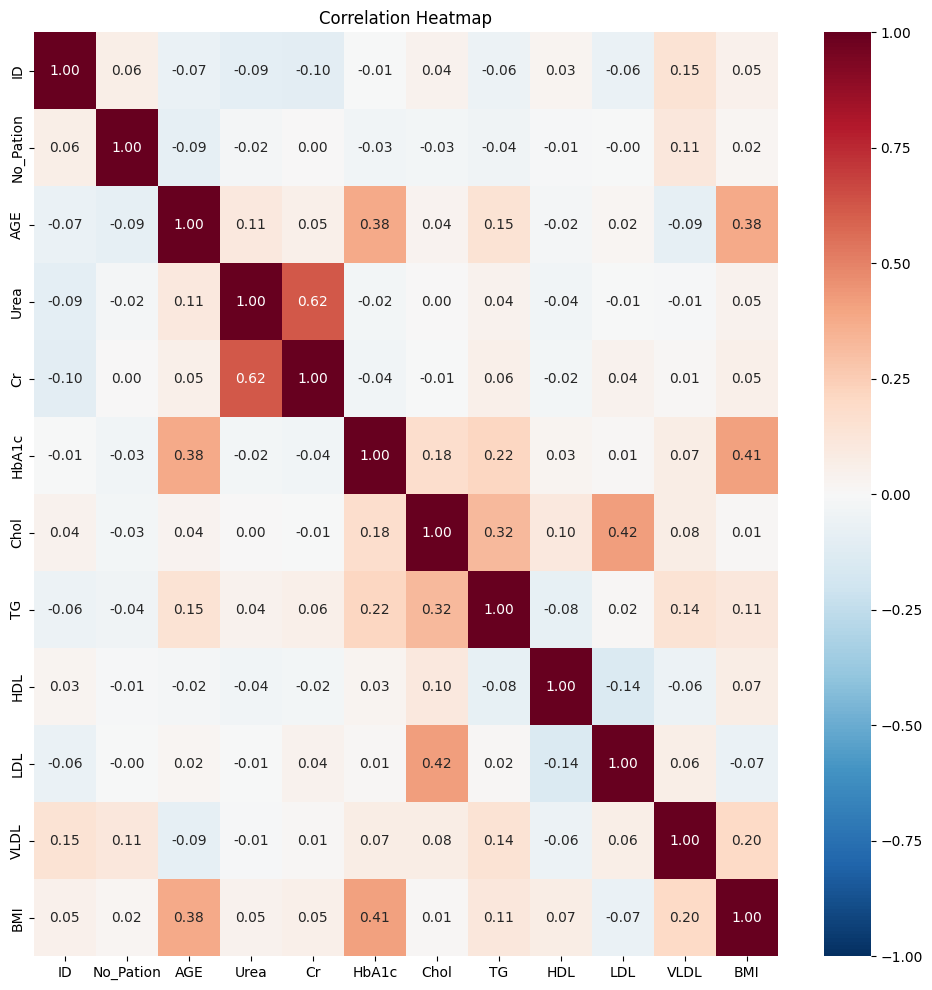

In [21]:
numeric_data = data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_data.corr(), vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r', annot=True, fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns (excluding categorical and ID)
num_cols = ['No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Standardizing numerical features
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(data[num_cols]), columns=num_cols)

# Display first few rows
print(X_scaled.head())


   No_Pation       AGE      Urea        Cr     HbA1c      Chol        TG  \
0  -0.074747 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
1  -0.069940 -3.130017 -0.212954 -0.115804 -1.334983 -0.893730 -0.678063   
2  -0.065869 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
3  -0.054126 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
4  -0.069939 -2.334096  0.673299 -0.382672 -1.334983  0.028576 -0.963680   

        HDL       LDL      VLDL       BMI  
0  1.810756 -1.085457 -0.369958 -1.124622  
1 -0.158692 -0.457398 -0.342649 -1.326239  
2  1.810756 -1.085457 -0.369958 -1.124622  
3  1.810756 -1.085457 -0.369958 -1.124622  
4 -0.613180 -0.547121 -0.397267 -1.729472  


In [26]:
X=data[num_cols]

In [51]:
y=data['CLASS']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state =0)

In [53]:
len(X_test)

300

In [54]:
len(X_train)


700

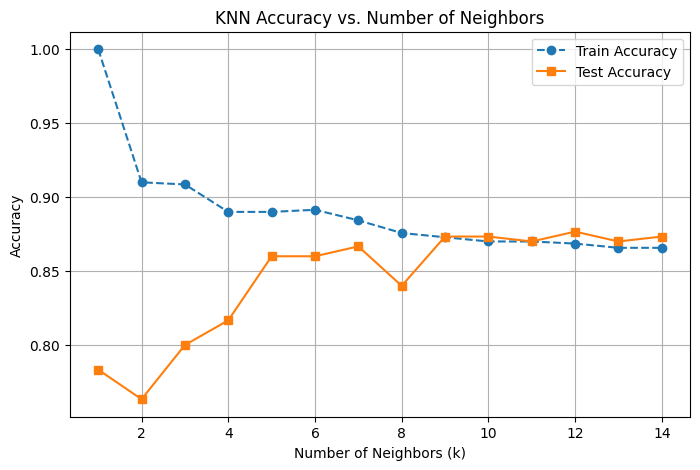

In [70]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

test_scores = []
train_scores = []

# Loop over k values from 1 to 14
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)  # Explicitly set k
    knn.fit(X_train, y_train)  # Train KNN model
    
    # Store accuracy scores
    train_scores.append(knn.score(X_train, y_train))  # Train accuracy
    test_scores.append(knn.score(X_test, y_test))  # Test accuracy

# Plot Train vs Test Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), train_scores, marker='o', linestyle='--', label='Train Accuracy')
plt.plot(range(1, 15), test_scores, marker='s', linestyle='-', label='Test Accuracy')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.legend()
plt.grid()
plt.show()


In [77]:
max_train_scores=max(train_scores)
train_scores_index=[i for i,v in enumerate(train_scores)if v==max_train_scores]
print("Max Train Score {} % and k={}".format(max_train_scores*100,list(map(lambda x:x+1,train_scores_index))))

Max Train Score 100.0 % and k=[1]


In [76]:
max_test_scores=max(test_scores)
test_scores_index=[i for i,v in enumerate(test_scores)if v==max_test_scores]
print("Max Test Score {} % and k={}".format(max_test_scores*100,list(map(lambda x:x+1,test_scores_index))))

Max Test Score 87.66666666666667 % and k=[12]


In [75]:
knn=KNeighborsClassifier(1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7833333333333333

In [74]:
best_k = 12  # Choose the best k from earlier results
knn = KNeighborsClassifier(best_k)
knn.fit(X_train, y_train)
print("Test Accuracy with k={}: {:.2f}%".format(best_k, knn.score(X_test, y_test) * 100))


Test Accuracy with k=12: 87.67%


In [73]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred) 

array([[ 15,   0,  13],
       [  1,   1,   9],
       [ 12,   3, 246]])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.54      0.54      0.54        28
           P       0.25      0.09      0.13        11
           Y       0.92      0.94      0.93       261

    accuracy                           0.87       300
   macro avg       0.57      0.52      0.53       300
weighted avg       0.86      0.87      0.86       300



In [71]:
print(data["CLASS"].value_counts())


CLASS
Y    844
N    103
P     53
Name: count, dtype: int64
